In [7]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
data_dir = "/Volumes/HD-PLFU3/AnalysisResult/"
df_path = "/Users/tomii/tmp/AnalysisResult/pv_stim_pandas.csv"
winrad = 4

In [4]:
df = pd.read_csv(df_path)

In [8]:
data = np.zeros([len(df), 4])

def phase_comp(p):
    return math.atan2(np.absolute(np.sin(p)), np.absolute(np.cos(p)))

for i in range(len(df)):
    s = df.loc[i,:]    

    theta_1 = s.stim_phase
    
    vec_pre = (s.stim_x - s.pre_x) + 1j*(s.stim_y - s.pre_y)
    theta_2 = phase_comp(np.angle(vec_pre) - s.fb_angle)
    l = np.abs(vec_pre) * 1000 / s.speed
    
    shift = np.abs(((s.pst_x - s.pre_x) + 1j*(s.pst_y - s.pre_y))) * 1000 / s.speed
    
    d = np.array([theta_1, theta_2, l, shift])
    data[i,:] = d
    #print i, s.sample, s.session, d

In [9]:
print df.loc[list(np.where(data[:,0]   <  -0.5*np.pi )[0]), ["sample", "session", "frame_start"]]
print data[np.where(data[:,0]   <  -0.5*np.pi ), :]

        sample  session  frame_start
10  20160907-3       11          400
11  20160907-3       17          360
13  20161019-1       18          370
14  20161019-1       19          370
15  20161019-2        6          170
18  20161019-2        9          190
27  20161019-2       18          190
28  20161019-2       19          200
29  20161019-2       20          210
35  20161019-3       25          255
[[[ -2.48086182   0.89412943  17.54116039   2.77350098]
  [ -2.84469657   1.45209099  22.42673806   7.29756383]
  [ -2.71337265   0.50006874  30.18461713   8.33333333]
  [ -1.71351379   0.1746722   16.49915823  39.51089864]
  [ -1.96593969   0.86217005  18.43908891  25.36839679]
  [ -2.93230223   1.19028995   7.18021974  23.37139752]
  [ -2.80538421   0.1798535   14.90711985   4.85340659]
  [ -2.42557414   0.28605144  11.81336343   2.40370085]
  [ -1.66214547   0.46364761   7.45355992   2.98142397]
  [ -2.04189594   0.55575572  16.66666667  28.67441756]]]


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


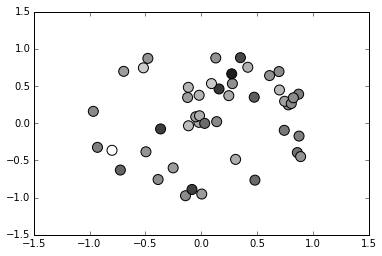

In [10]:
#thre = np.max(data[:,2])*0.5
thre = np.mean(data[:,2])

x =  np.cos(data[:,0])
y = np.sin(data[:,0])
x *= np.absolute(np.cos(data[:,1]))
y *= np.absolute(np.cos(data[:,1]))

#rgb = (np.c_[data[:,2], data[:,2], data[:,2]] > thre)*1.0
rgb = np.c_[data[:,2], data[:,2], data[:,2]] / np.max(data[:,2])
#rgb[:,1] = 0.0
#rgb[:,2] = 1-rgb[:,0]

fig, ax = plt.subplots()
ax.scatter(x, y, s=100, facecolors=rgb)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

In [11]:
np.max(data[:,2])

30.184617127124724